# Create crossval tables

This notebook is dedicated to create the cv table to all tunings produced during 2020 for tracking purpose.


In [20]:
from core import crossval_table, get_color_fader
from Gaugi import mkdir_p
from copy import copy
from pprint import pprint
import numpy as np
import pandas as pd
import collections
import os
import matplotlib
import matplotlib.pyplot as plt

import atlas_mpl_style as ampl
ampl.use_atlas_style()

%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
mkdir_p('output/crossval')

In [22]:
def create_op_dict(op, decoration='reference'):
    
    d = collections.OrderedDict( {
              # validation
              "max_sp_val"      : 'summary/max_sp_val',
              "max_sp_pd_val"   : 'summary/max_sp_pd_val#0',
              "max_sp_fa_val"   : 'summary/max_sp_fa_val#0',
              # Operation
              "max_sp_op"       : 'summary/max_sp_op',
              "max_sp_pd_op"    : 'summary/max_sp_pd_op#0',
              "max_sp_fa_op"    : 'summary/max_sp_fa_op#0',
              
              # op
              'pd_ref'    : decoration+"/"+op+"/pd_ref#0",
              'fa_ref'    : decoration+"/"+op+"/fa_ref#0",
              'sp_ref'    : decoration+"/"+op+"/sp_ref",
              'pd_val'    : decoration+"/"+op+"/pd_val#0",
              'fa_val'    : decoration+"/"+op+"/fa_val#0",
              'sp_val'    : decoration+"/"+op+"/sp_val",
              'pd_op'     : decoration+"/"+op+"/pd_op#0",
              'fa_op'     : decoration+"/"+op+"/fa_op#0",
              'sp_op'     : decoration+"/"+op+"/sp_op",

              # Counts
              'pd_ref_passed'    : decoration+"/"+op+"/pd_ref#1",
              'fa_ref_passed'    : decoration+"/"+op+"/fa_ref#1",
              'pd_ref_total'     : decoration+"/"+op+"/pd_ref#2",
              'fa_ref_total'     : decoration+"/"+op+"/fa_ref#2",
              'pd_val_passed'    : decoration+"/"+op+"/pd_val#1",
              'fa_val_passed'    : decoration+"/"+op+"/fa_val#1",
              'pd_val_total'     : decoration+"/"+op+"/pd_val#2",
              'fa_val_total'     : decoration+"/"+op+"/fa_val#2",
              'pd_op_passed'     : decoration+"/"+op+"/pd_op#1",
              'fa_op_passed'     : decoration+"/"+op+"/fa_op#1",
              'pd_op_total'      : decoration+"/"+op+"/pd_op#2",
              'fa_op_total'      : decoration+"/"+op+"/fa_op#2",
    })
    return d


op_names = ['tight', 'medium', 'loose', 'vloose']

tuned_info = collections.OrderedDict({})
for op in op_names:
    tuned_info[op] = create_op_dict(op, "reference")

In [23]:
etbins = [15, 20, 30, 40, 50, 1000000]
etabins = [0.0, 0.8, 1.37, 1.54, 2.37, 2.50]

## 1) Reading all tunings:


In [38]:
cv_v8  = crossval_table( tuned_info, etbins = etbins , etabins = etabins )
cv_v9  = crossval_table( tuned_info, etbins = etbins , etabins = etabins )
cv_v10 = crossval_table( tuned_info, etbins = etbins , etabins = etabins )
cv_v11 = crossval_table( tuned_info, etbins = etbins , etabins = etabins )
cv_v12 = crossval_table( tuned_info, etbins = etbins , etabins = etabins )
cv_v13 = crossval_table( tuned_info, etbins = etbins , etabins = etabins )
cv_v14 = crossval_table( tuned_info, etbins = etbins , etabins = etabins )
cv_v15 = crossval_table( tuned_info, etbins = etbins , etabins = etabins )
cv_v16 = crossval_table( tuned_info, etbins = etbins , etabins = etabins )

In [39]:
cv_v8.from_csv('v8/output/crossval/table_v8.csv')
cv_v9.from_csv('v9/output/crossval/table_v9.csv')
cv_v10.from_csv('v10/output/crossval/table_v10.csv')
cv_v11.from_csv('v11/output/crossval/table_v11.csv')
cv_v12.from_csv('v12/output/crossval/table_v12.csv')
cv_v13.from_csv('v13/output/crossval/table_v13.csv')
cv_v14.from_csv('v14/output/crossval/table_v14.csv')
cv_v15.from_csv('v15/output/crossval/table_v15.csv')
cv_v16.from_csv('v16/output/crossval/table_v16.csv')

In [40]:
best_inits_v8 = cv_v8.filter_inits("max_sp_val")
best_inits_v8 = best_inits_v8.loc[best_inits_v8.model_idx==3]
best_sorts_v8 = cv_v8.filter_sorts( best_inits_v8 , 'max_sp_op')

In [41]:
best_inits_v9 = cv_v9.filter_inits("max_sp_val")
best_sorts_v9 = cv_v9.filter_sorts( best_inits_v9, 'max_sp_op')
best_inits_v9 = best_inits_v9.loc[best_inits_v9.model_idx==0]

In [42]:
best_inits_v10 = cv_v10.filter_inits("max_sp_val")
best_sorts_v10 = cv_v10.filter_sorts( best_inits_v10, 'max_sp_op')
best_inits_v10 = best_inits_v10.loc[best_inits_v10.model_idx==0]

In [43]:
best_inits_v11 = cv_v11.filter_inits("max_sp_val")
best_sorts_v11 = cv_v11.filter_sorts( best_inits_v11, 'max_sp_op')
best_inits_v11 = best_inits_v11.loc[best_inits_v11.model_idx==0]

In [44]:
best_inits_v12= cv_v12.filter_inits("max_sp_val")
best_inits_v12 = best_inits_v12.loc[best_inits_v12.model_idx==3]
best_sorts_v12 = cv_v12.filter_sorts( best_inits_v12, 'max_sp_op')

In [45]:
best_inits_v13 = cv_v13.filter_inits("max_sp_val")
best_sorts_v13 = cv_v13.filter_sorts( best_inits_v13, 'max_sp_op')
best_inits_v13 = best_inits_v13.loc[best_inits_v13.model_idx==0]

In [46]:
best_inits_v14 = cv_v14.filter_inits("max_sp_val")
best_sorts_v14 = cv_v14.filter_sorts( best_inits_v14, 'max_sp_op')
best_inits_v14 = best_inits_v14.loc[best_inits_v14.model_idx==0]

In [47]:
best_inits_v15 = cv_v15.filter_inits("max_sp_val")
best_sorts_v15 = cv_v15.filter_sorts( best_inits_v15, 'max_sp_op')
best_inits_v15 = best_inits_v15.loc[best_inits_v15.model_idx==0]

In [48]:
best_inits_v16 = cv_v16.filter_inits("max_sp_val")
best_sorts_v16 = cv_v16.filter_sorts( best_inits_v16, 'max_sp_op')
best_inits_v16 = best_inits_v16.loc[best_inits_v16.model_idx==0]

In [49]:
best_inits = pd.concat([
                        best_inits_v8,
                        best_inits_v9,
                        best_inits_v10,
                        best_inits_v11,
                        best_inits_v12,
                        best_inits_v13,
                        best_inits_v14,
                        best_inits_v15,
                        #best_inits_v16,
                       ])
                       
best_sorts = pd.concat([
                        best_sorts_v8,
                        best_sorts_v9,
                        best_sorts_v10,
                        best_sorts_v11,
                        #best_sorts_v12,
                        #best_sorts_v13,
                        #best_sorts_v14,
                        #best_sorts_v15,
                        best_sorts_v16,
                       ])

### 1.2) Make the table:

In [50]:
for op in op_names:
    cv_v8.dump_beamer_table( best_inits.loc[best_inits.op_name == op] ,  
                            'tuning_v8_to_v15_'+op+'_25bins', 
                             title = op+' Tunings (v8 to v16)', 
                             tags = ['v8','v12','v9','v13', 'v10','v14','v11','v15']
                             #tags = ['v8','v9','v10','v11','v16' ]


                           )

2022-04-06 13:08:05,282 | Py.BeamerTexReportTemplate1             INFO Started creating beamer file tuning_v8_to_v15_tight_25bins.pdf latex code...
2022-04-06 13:08:07,666 | Py.BeamerTexReportTemplate1             INFO Started creating beamer file tuning_v8_to_v15_medium_25bins.pdf latex code...
2022-04-06 13:08:09,913 | Py.BeamerTexReportTemplate1             INFO Started creating beamer file tuning_v8_to_v15_loose_25bins.pdf latex code...
2022-04-06 13:08:12,163 | Py.BeamerTexReportTemplate1             INFO Started creating beamer file tuning_v8_to_v15_vloose_25bins.pdf latex code...


In [37]:
!mv *.tex output/crossval
!mv *.pdf output/crossval

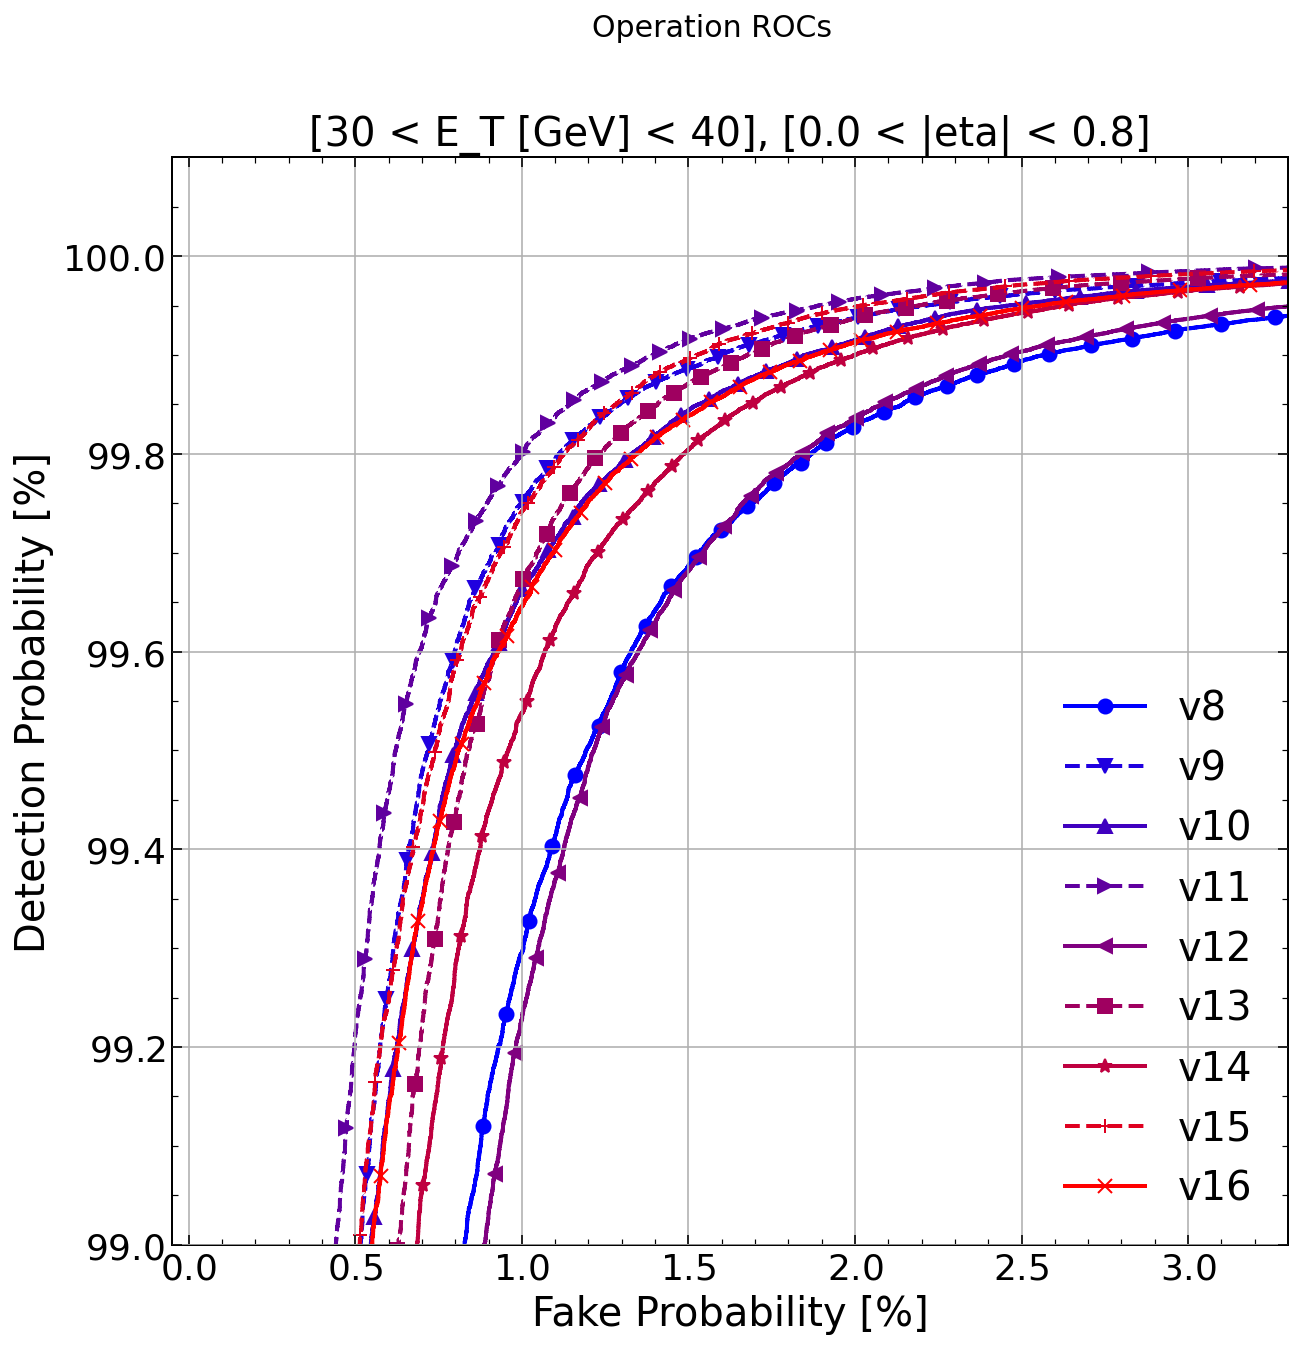

In [105]:
lines = ['solid','dashed','solid','dashed','solid','dashed','solid','dashed','solid']
markers = ['o','v','^','>', '<', 's','*', '+','x']
cv_v8.plot_roc_curves( best_sorts, ['v8','v9','v10','v11','v12','v13','v14','v15','v16' ], 
                        ['v8','v9','v10','v11','v12','v13','v14','v15','v16' ], 
                        'output/roc_v8_to_v16_et2_eta0.pdf', 
                        display=True, 
                        colors=get_color_fader('blue','red',9),
                        et_bin=2, eta_bin=0, xmin=-0.05, xmax=3.3, 
                        ymin=99, 
                        ymax=100.1, 
                        fontsize=20,
                        markers=markers,
                        lines=lines,
                        title='[30 < E_T [GeV] < 40], [0.0 < |eta| < 0.8]',
                        #pd_ref = 0.998,
                        figsize=(10,10))

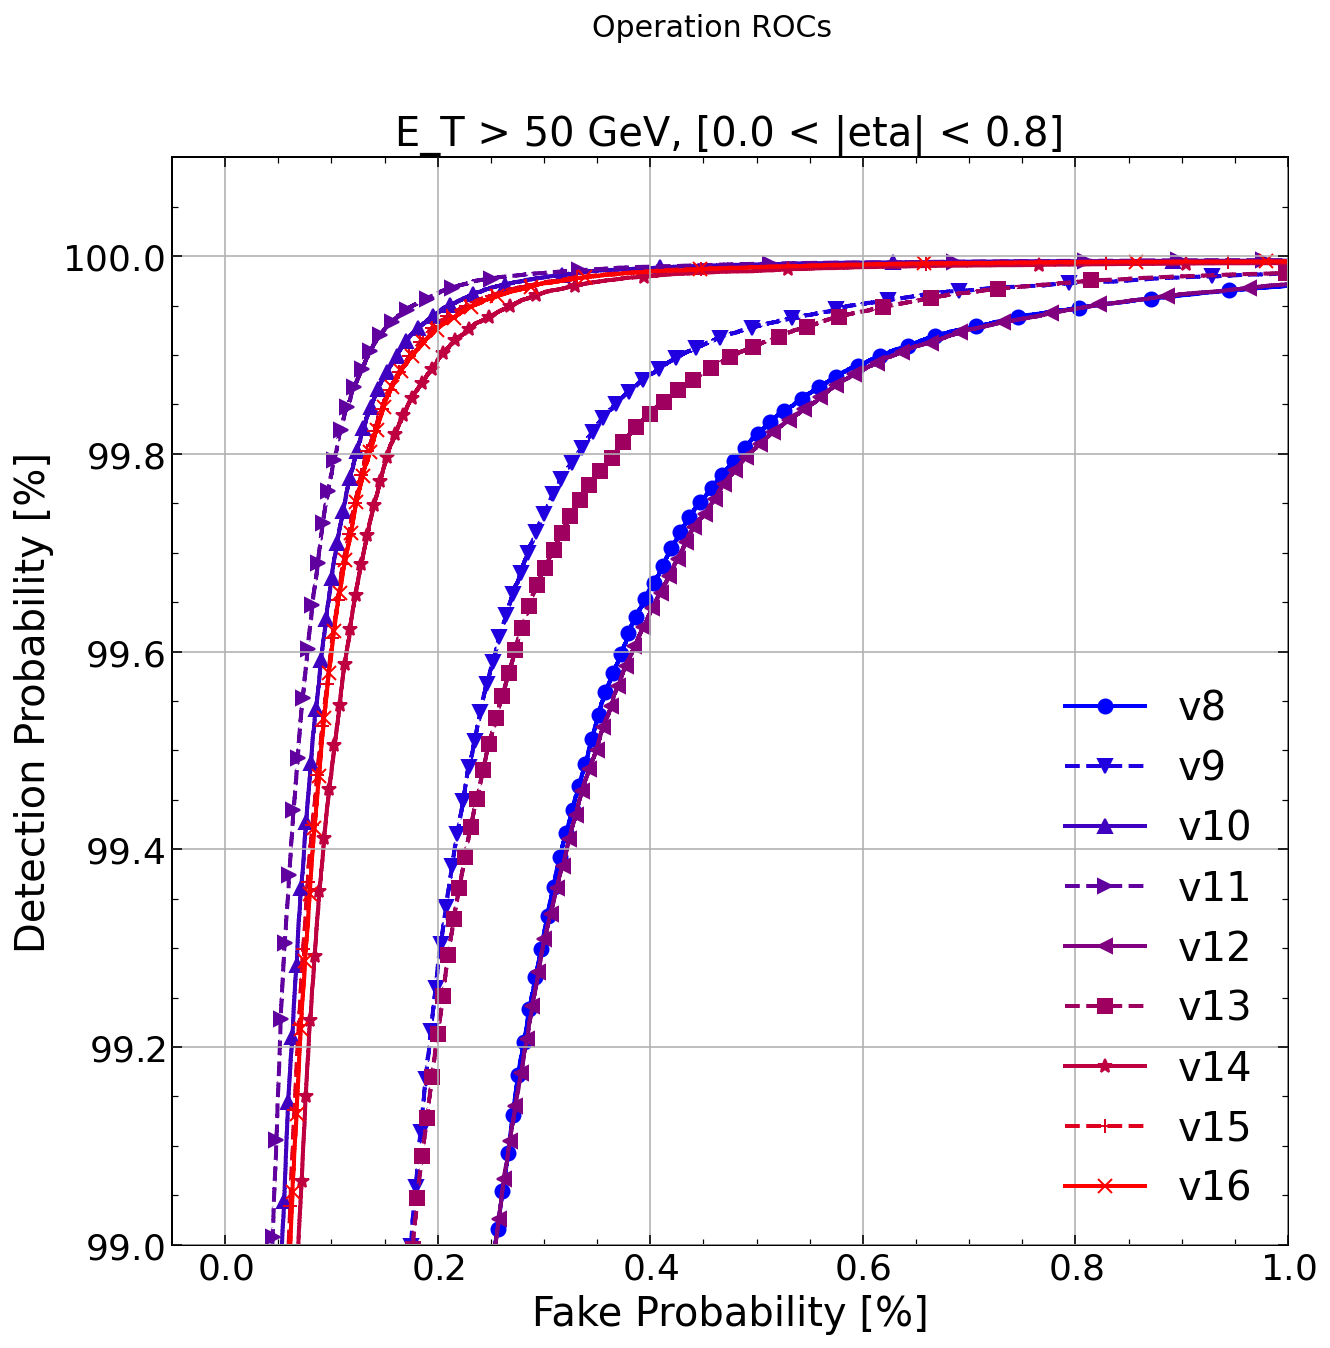

In [107]:
lines = ['solid','dashed','solid','dashed','solid','dashed','solid','dashed','solid']
markers = ['o','v','^','>', '<', 's','*', '+','x']
cv_v8.plot_roc_curves( best_sorts, ['v8','v9','v10','v11','v12','v13','v14','v15','v16' ], 
                        ['v8','v9','v10','v11','v12','v13','v14','v15','v16' ], 
                        'output/roc_v8_to_v16_et4_eta0.pdf', 
                        display=True, 
                        colors=get_color_fader('blue','red',9),
                        et_bin=4, eta_bin=0, xmin=-0.05, xmax=1, 
                        ymin=99, 
                        ymax=100.1, 
                        fontsize=20,
                        markers=markers,
                        lines=lines,
                        title='E_T > 50 GeV, [0.0 < |eta| < 0.8]',
                        figsize=(10,10))

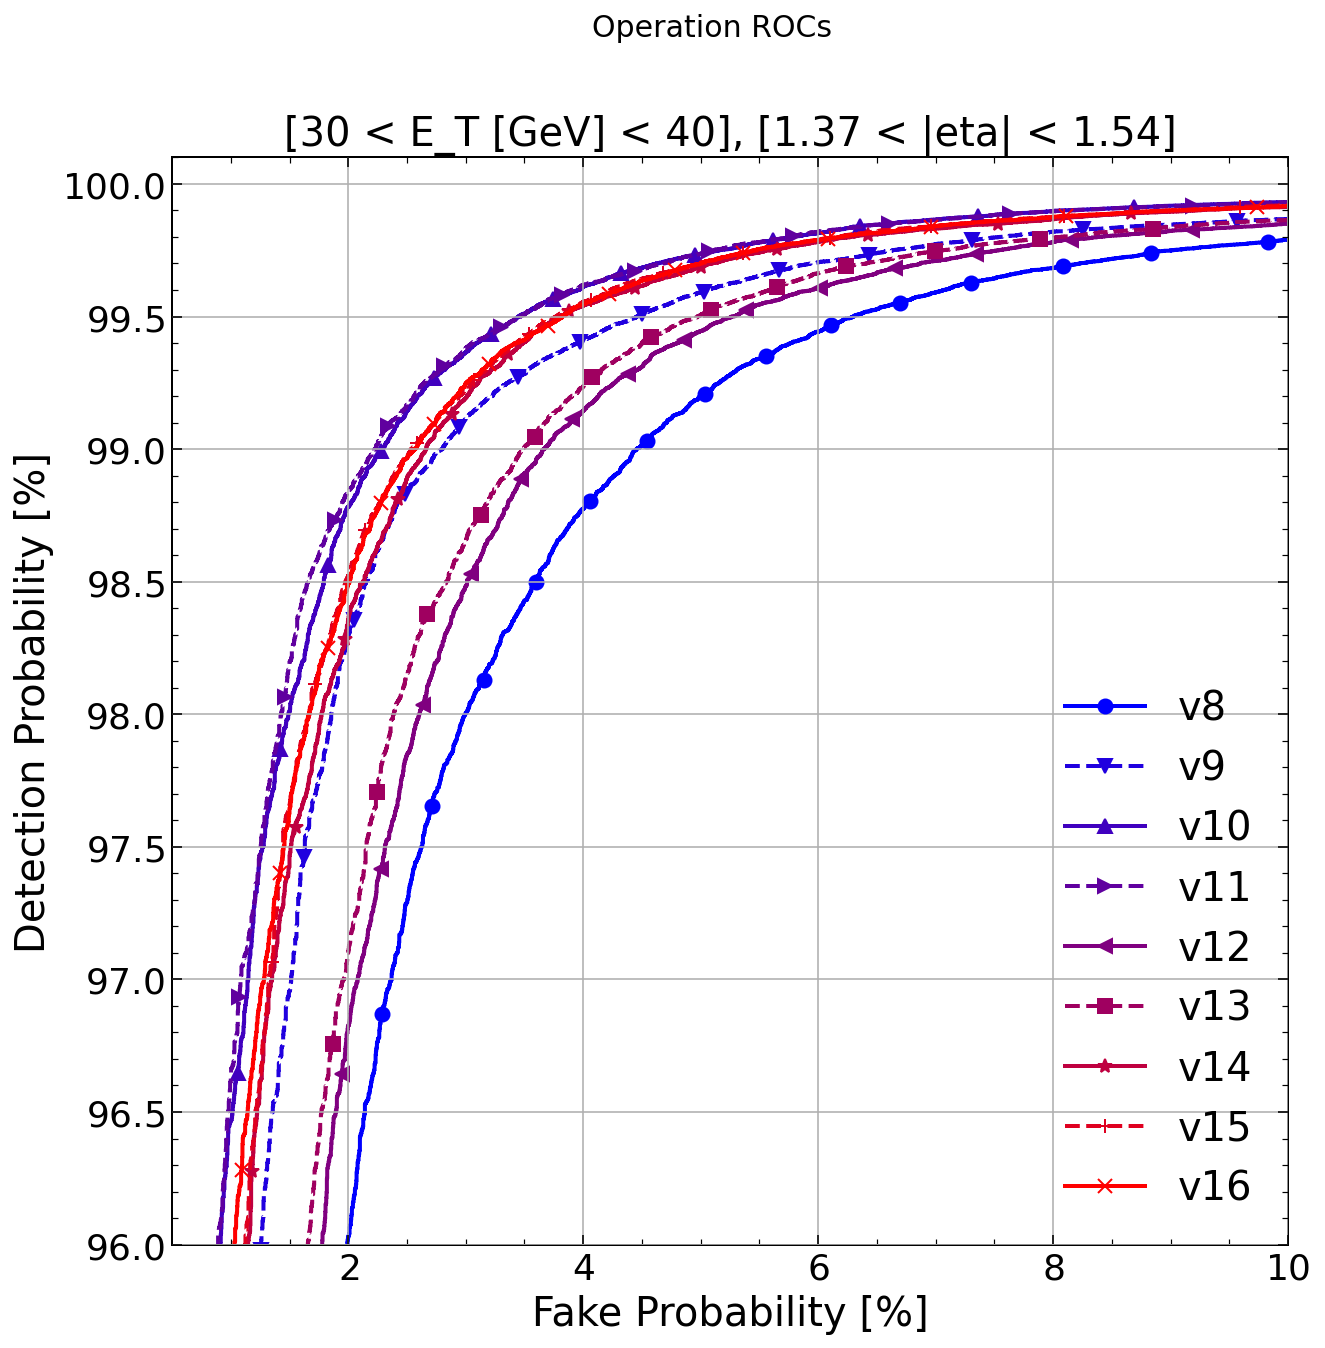

In [111]:
lines = ['solid','dashed','solid','dashed','solid','dashed','solid','dashed','solid']
markers = ['o','v','^','>', '<', 's','*', '+','x']
cv_v8.plot_roc_curves( best_sorts, ['v8','v9','v10','v11','v12','v13','v14','v15','v16' ], 
                        ['v8','v9','v10','v11','v12','v13','v14','v15','v16' ], 
                        'output/roc_v8_to_v16_et2_eta2.pdf', 
                        display=True, 
                        colors=get_color_fader('blue','red',9),
                        et_bin=2, eta_bin=2, xmin=0.5, xmax=10, 
                        ymin=96, 
                        ymax=100.1, 
                        fontsize=20,
                        markers=markers,
                        lines=lines,
                        title='[30 < E_T [GeV] < 40], [1.37 < |eta| < 1.54]',
                        figsize=(10,10))

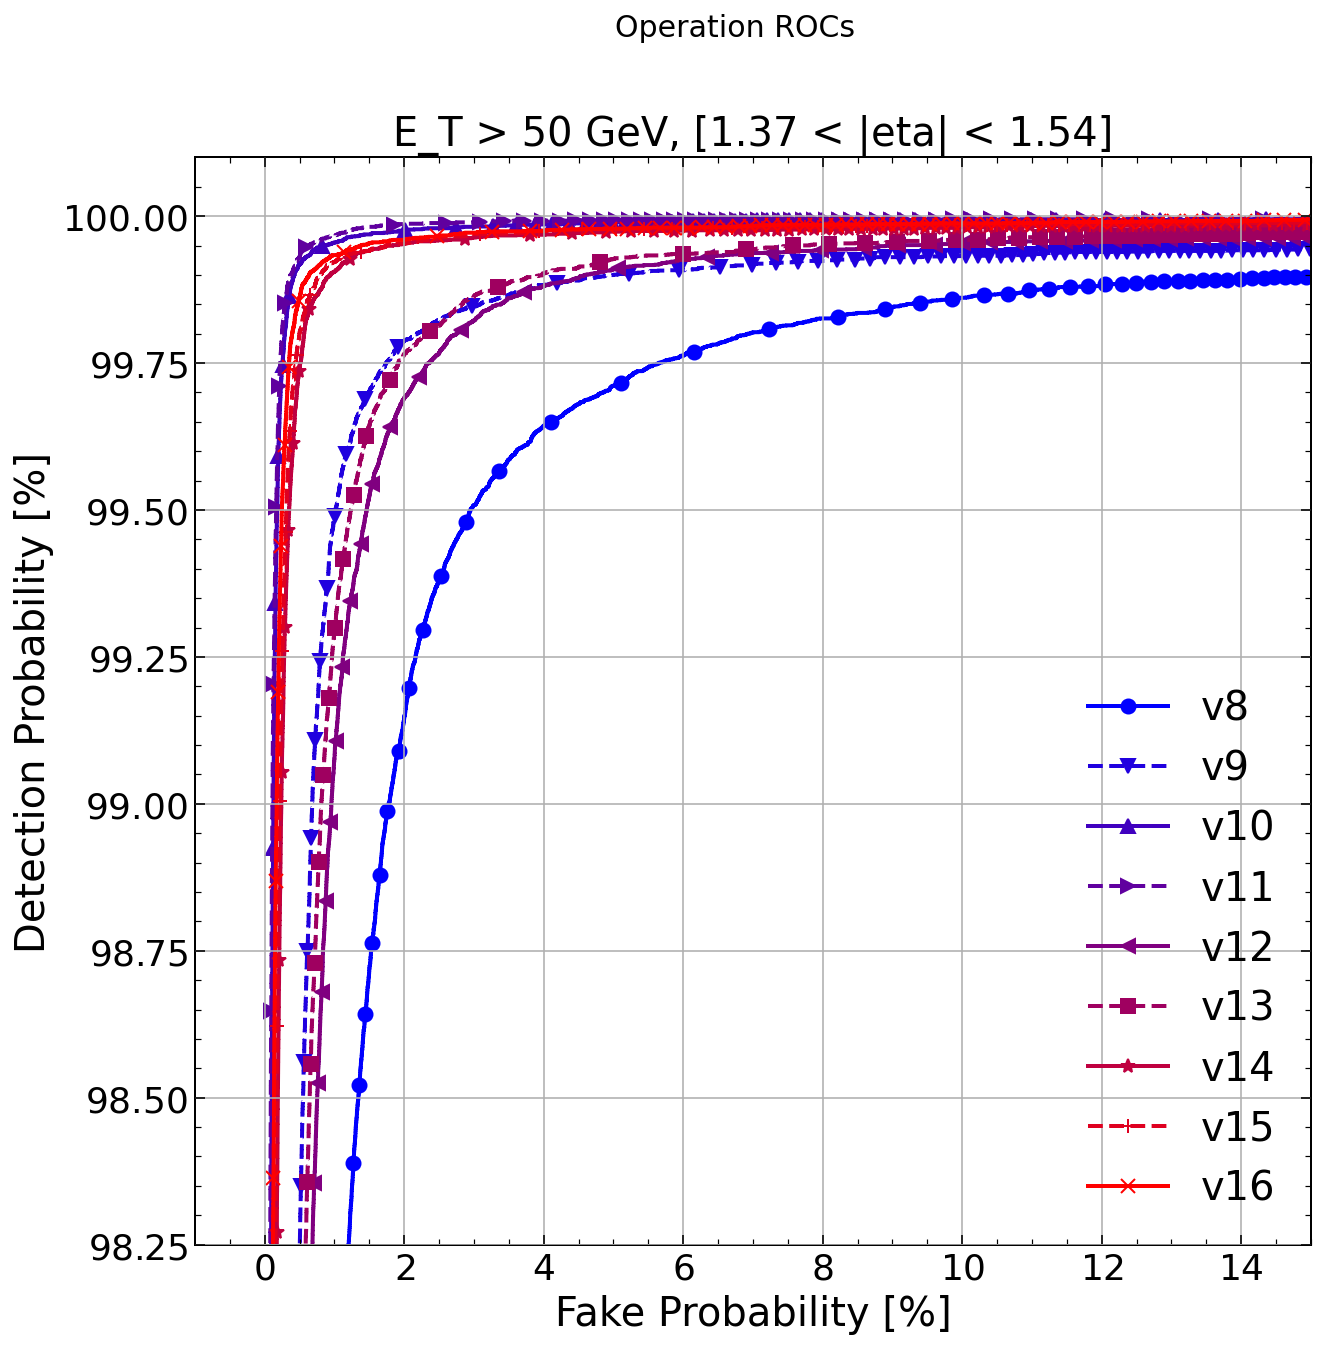

In [113]:
lines = ['solid','dashed','solid','dashed','solid','dashed','solid','dashed','solid']
markers = ['o','v','^','>', '<', 's','*', '+','x']
cv_v8.plot_roc_curves( best_sorts, ['v8','v9','v10','v11','v12','v13','v14','v15','v16' ], 
                        ['v8','v9','v10','v11','v12','v13','v14','v15','v16' ], 
                        'output/roc_v8_to_v16_et4_eta2.pdf', 
                        display=True, 
                        colors=get_color_fader('blue','red',9),
                        et_bin=4, eta_bin=2, xmin=-1, xmax=15, 
                        ymin=98.25, 
                        ymax=100.1, 
                        fontsize=20,
                        markers=markers,
                        lines=lines,
                        title='E_T > 50 GeV, [1.37 < |eta| < 1.54]',
                        figsize=(10,10))